In [ ]:
!pip3 install transformers -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.5 MB/s eta 0:00:00


In [ ]:
!pip3 install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 21.7 MB/s eta 0:00:00


In [ ]:
import transformers
print(transformers.__version__)

4.28.1


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_df = pd.read_json("train.jsonl", lines = True)
test_df = pd.read_json("validation.jsonl", lines = True)

In [ ]:
def list_to_string(spoiler_type):
  if spoiler_type[0] == "phrase":
    return 0
  elif spoiler_type[0] == "passage":
    return 1
  elif spoiler_type[0] == "multi":
    return 2

In [ ]:
train_df["tags"] = train_df["tags"].apply(list_to_string)
test_df["tags"] = test_df["tags"].apply(list_to_string)

In [ ]:
train_df = train_df[train_df['tags']==2]
test_df = test_df[test_df['tags']==2]

In [ ]:
train_df.head()

,uuid,postId,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,targetKeywords,targetMedia,targetUrl,provenance,spoiler,spoilerPositions,tags
3,31ecf93c-3e21-4c80-949b-aa549a046b93,844567852531286016,[Passion is overrated — 7 work habits you need...,Twitter,"[It’s common wisdom. Near gospel really, and n...","‘Follow your passion’ is wrong, here are 7 hab...",There's a lot more to work that loving your job,"business, work-life, careers",None,None,"{'source': 'anonymized', 'humanSpoiler': None,...",[Purpose connects us to something bigger and i...,"[[[11, 25], [11, 101]], [[17, 56], [17, 85]], ...",2
9,e26fa6ed-e364-4666-af8e-20fbada53839,4oeqo8,[Hot Sauce Taste Test: Find out which we named...,reddit,[We tried 29 different kinds of hot sauce to f...,"Taste test: 29 hot sauce bottles, ranked",From Tapatio to Cholula and every hot sauce in...,None,[https://media.timeout.com/images/102427393/63...,https://www.timeout.com/los-angeles/restaurant...,"{'source': 'anonymized', 'humanSpoiler': 'It's...","[Sriracha Hot Chili Sauce, Frank's RedHot Orig...","[[[35, 3], [35, 27]], [[33, 3], [33, 32]], [[3...",2
20,0d1dc4bd-2dac-4989-9c75-4264212dee9e,586611196251525120,[Human remains found in the search for missing...,Twitter,[Authorities have uncovered human remains duri...,Human Remains Found In Search For Missing Teen...,Authorities have uncovered human remains durin...,"video,remains found anjelica Hadsell,Anjelica ...",[http://big.assets.huffingtonpost.com/FBLOGO_0...,http://huff.to/1NlYaVl,"{'source': 'anonymized', 'humanSpoiler': 'IN S...","[Southampton County, Anjelica 'AJ' Hadsell]","[[[1, 105], [1, 123]], [[2, 140], [2, 161]]]",2
43,dcc19cfd-baed-4899-9c6a-bf223b88a9b9,390180317195018240,[Six lessons from the godfather of California ...,Twitter,[When asked to describe the current state of C...,6 Lessons From The Pioneer Of Modern Californi...,When asked to describe the current state of Ca...,"Daniel Patterson,daniel patterson san francisc...",[http://i.huffpost.com/gadgets/slideshows/3210...,http://huff.to/1coFtLd,"{'source': 'anonymized', 'humanSpoiler': 'Godf...","[Daniel Patterson, 1) Eat your veggies., 2) En...","[[[0, 69], [0, 85]], [[6, 0], [6, 20]], [[7, 0...",2
44,624f966c-b819-42c3-8db0-92f888874ddf,47ynoi,[The Fastest Growing Economy in the World! Num...,reddit,"[By Jeff Russell, B. Comm., MA Published : Sep...",The Fastest Growing Economies in the World (No...,Here is the list of top 10 fastest growing eco...,None,[http://www.profitconfidential.com/wp-content/...,http://www.profitconfidential.com/economy/the-...,"{'source': 'anonymized', 'humanSpoiler': 'No. ...","[1. India, 2. Bangladesh, 3. China, 4. Indones...","[[[49, 0], [49, 8]], [[44, 0], [44, 13]], [[40...",2


In [ ]:
test_df.head()

,uuid,postId,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,targetKeywords,targetMedia,targetUrl,provenance,spoiler,spoilerPositions,tags
1,435b24de-56f6-4d4e-9c38-54b8e0630aac,4jp20e,[Why Arizona Sheriff Joe Arpaio’s fate could h...,reddit,[© REUTERS/Laura Segall Maricopa County Sherif...,Why Arizona Sheriff Joe Arpaio’s fate could ha...,"<p>A single word — ""intentionally"" — could tra...",None,[https://archive.is/0eGBT/bbf6d79b366fc7e75b8b...,https://archive.is/0eGBT,"{'source': 'anonymized', 'humanSpoiler': '""Int...","[""intentionally"", could transform a court case...","[[[0, 197], [0, 212]], [[0, 215], [0, 328]]]",2
3,8b713277-0e5b-4873-a216-b650f21f3b4c,389091583213453312,"[""Harry Potter"" alums reunite for new movie]",Twitter,[The mythology of punk music's evolution can b...,"Alan Rickman & Rupert Grint On 'CBGB,' Reuniti...",The mythology of punk music's evolution can be...,"Alan Rickman,Hilly Kristal,new rupert grint mo...",[http://s.m.huffpost.com/assets/Logo_Huffingto...,http://huff.to/1ccNwKJ,"{'source': 'anonymized', 'humanSpoiler': 'Alan...","[Alan Rickman & Rupert Grint, CBGB]","[[[-1, 0], [-1, 27]], [[0, 98], [0, 102]]]",2
10,57c972a1-0fe2-4bef-a71f-1d56561e4a3b,382646673979498497,[How 1 model prepares for lingerie shoots],Twitter,[The life of a lingerie model is quite a forei...,"Elettra Wiedemann, Agent Provocateur Model, Ex...",The life of a lingerie model is quite a foreig...,"video,Agent Provocateur lingerie,Agent Provoca...",[http://s.m.huffpost.com/assets/Logo_Huffingto...,http://huff.to/1eDU4Wk,"{'source': 'anonymized', 'humanSpoiler': 'Elet...","[Elettra Wiedemann, extra strength work, so we...","[[[0, 190], [0, 207]], [[4, 18], [4, 172]]]",2
13,59a80c2a-4f64-4ba6-a87c-712dd5208f7d,414459946798182400,[The question former O.J. Simpson prosecutor h...,Twitter,[As the lead prosecutor in the O.J. Simpson mu...,Former Prosecutor Marcia Clark On Life After T...,As the lead prosecutor in the O.J. Simpson mur...,"O.J. Simpson,Marcia Clark,Rachel Knight,Rachel...",[http://s.m.huffpost.com/assets/Logo_Huffingto...,http://huff.to/1cWwQsq,"{'source': 'anonymized', 'humanSpoiler': 'Does...","[Marcia Clark, Does she think Simpson really d...","[[[0, 56], [0, 68]], [[5, 83], [5, 120]]]",2
14,6e4a3235-bc25-4b10-9609-26c0b940b417,382921628117504001,[Hollywood legend's amazing home is on the mar...,Twitter,[Hollywood legend Mitzi Gaynor is reportedly s...,Mitzi Gaynor's California Home For Sale Has Ho...,Hollywood legend Mitzi Gaynor is reportedly se...,"video,mitzi gaynor home for sale,Mitzi Gaynor,...",[http://i.huffpost.com/gen/1372396/images/o-MI...,http://huff.to/1eGIhXc,"{'source': 'anonymized', 'humanSpoiler': 'Mitz...","[Mitzi Gaynor, Beverly Hills, California]","[[[0, 17], [0, 29]], [[0, 56], [0, 81]]]",2


In [ ]:
test_df.iloc[2]["spoiler"]

['Elettra Wiedemann',
 'extra strength work, so weights, and quite a few planks for my core. My diet stayed pretty much the same, except I cut out sugar for the week of the shoot']

In [ ]:
train_df.shape

(559, 14)

In [ ]:
test_df.shape

(143, 14)

In [ ]:
train_df[["spoiler"]].dropna(axis = 0)

,spoiler
3,[Purpose connects us to something bigger and i...
9,"[Sriracha Hot Chili Sauce, Frank's RedHot Orig..."
20,"[Southampton County, Anjelica 'AJ' Hadsell]"
43,"[Daniel Patterson, 1) Eat your veggies., 2) En..."
44,"[1. India, 2. Bangladesh, 3. China, 4. Indones..."
...,...
3188,"[Georgia, Kentucky]"
3190,"[Terry Kniess, All of the prices in the show h..."
3191,"[Relax with rain sounds., Put pressure on peri..."
3192,[Cream cheese with a bit of strawberry jam on ...


In [ ]:
test_df[["spoiler"]].dropna(axis = 0)

,spoiler
1,"[""intentionally"", could transform a court case..."
3,"[Alan Rickman & Rupert Grint, CBGB]"
10,"[Elettra Wiedemann, extra strength work, so we..."
13,"[Marcia Clark, Does she think Simpson really d..."
14,"[Mitzi Gaynor, Beverly Hills, California]"
...,...
785,"[BOOM – Portugal, Meadows in the Mountains – B..."
788,[earned much of their fortune making unintenti...
789,"[Klefki, Rotom, Luvdisk, Unknown (Unown), Vani..."
790,"[I don’t pretend to be an ordinary housewife, ..."


In [ ]:
print(train_df.iloc[0].to_dict()["postText"])
print(train_df.iloc[0].to_dict()["targetTitle"])

print(train_df.iloc[1].to_dict()["postText"])
print(train_df.iloc[1].to_dict()["targetTitle"])

['Passion is overrated —\xa07 work habits you need instead']
‘Follow your passion’ is wrong, here are 7 habits you need instead
['Hot Sauce Taste Test: Find out which we named number 1']
Taste test: 29 hot sauce bottles, ranked


In [ ]:
def preprocess_data(data):

  no_of_rows = data.shape[0]
  formatted_data = []
  for index in range(no_of_rows):
    complete_description = " ".join(data.iloc[index].to_dict()["targetParagraphs"])
    row = {}
    row["id"] = data.iloc[index].to_dict()["uuid"]
    row["context"] = complete_description,
    row["question"] = data.iloc[index].to_dict()["postText"][0],
    row["answers"] = {
        "text": data.iloc[index].to_dict()["spoiler"],
        "answer_start": [complete_description.find(data.iloc[index].to_dict()["spoiler"][0])]
    }
    formatted_data.append(row)
  
  return formatted_data

In [ ]:
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

In [ ]:
train_df= pd.DataFrame(train_df)
test_df = pd.DataFrame(test_df)

In [ ]:
train_df.head()

,id,context,question,answers
0,31ecf93c-3e21-4c80-949b-aa549a046b93,"(It’s common wisdom. Near gospel really, and n...",(Passion is overrated — 7 work habits you need...,{'text': ['Purpose connects us to something bi...
1,e26fa6ed-e364-4666-af8e-20fbada53839,(We tried 29 different kinds of hot sauce to f...,(Hot Sauce Taste Test: Find out which we named...,"{'text': ['Sriracha Hot Chili Sauce', 'Frank's..."
2,0d1dc4bd-2dac-4989-9c75-4264212dee9e,(Authorities have uncovered human remains duri...,(Human remains found in the search for missing...,"{'text': ['Southampton County', 'Anjelica 'AJ'..."
3,dcc19cfd-baed-4899-9c6a-bf223b88a9b9,(When asked to describe the current state of C...,(Six lessons from the godfather of California ...,"{'text': ['Daniel Patterson', '1) Eat your veg..."
4,624f966c-b819-42c3-8db0-92f888874ddf,"(By Jeff Russell, B. Comm., MA Published : Sep...",(The Fastest Growing Economy in the World! Num...,"{'text': ['1. India', '2. Bangladesh', '3. Chi..."


In [ ]:
test_df.head()

,id,context,question,answers
0,435b24de-56f6-4d4e-9c38-54b8e0630aac,(© REUTERS/Laura Segall Maricopa County Sherif...,(Why Arizona Sheriff Joe Arpaio’s fate could h...,"{'text': ['""intentionally""', 'could transform ..."
1,8b713277-0e5b-4873-a216-b650f21f3b4c,(The mythology of punk music's evolution can b...,"(""Harry Potter"" alums reunite for new movie,)","{'text': ['Alan Rickman & Rupert Grint', 'CBGB..."
2,57c972a1-0fe2-4bef-a71f-1d56561e4a3b,(The life of a lingerie model is quite a forei...,"(How 1 model prepares for lingerie shoots,)","{'text': ['Elettra Wiedemann', 'extra strength..."
3,59a80c2a-4f64-4ba6-a87c-712dd5208f7d,(As the lead prosecutor in the O.J. Simpson mu...,(The question former O.J. Simpson prosecutor h...,"{'text': ['Marcia Clark', 'Does she think Simp..."
4,6e4a3235-bc25-4b10-9609-26c0b940b417,(Hollywood legend Mitzi Gaynor is reportedly s...,(Hollywood legend's amazing home is on the mar...,"{'text': ['Mitzi Gaynor', 'Beverly Hills, Cali..."


In [ ]:
def return_text(text):
  return text[0]

In [ ]:
train_df["context"] = train_df["context"].apply(return_text)
test_df["context"] = test_df["context"].apply(return_text)

In [ ]:
train_df["question"] = train_df["question"].apply(return_text)
test_df["question"] = test_df["question"].apply(return_text)

In [ ]:
model_checkpoint = "t5-base"

In [ ]:
from transformers import (
    AdamW,
    T5ForConditionalGeneration,
    T5TokenizerFast as T5Tokenizer
)

from tqdm.auto import tqdm

In [ ]:
MODEL_NAME = "t5-base"

tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [ ]:
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style="whitegrid", palette='muted', font_scale = 1.2)
rcParams['figure.figsize'] = 16,10

In [ ]:
train_df.head()

,id,context,question,answers
0,31ecf93c-3e21-4c80-949b-aa549a046b93,"It’s common wisdom. Near gospel really, and no...",Passion is overrated — 7 work habits you need ...,{'text': ['Purpose connects us to something bi...
1,e26fa6ed-e364-4666-af8e-20fbada53839,We tried 29 different kinds of hot sauce to fi...,Hot Sauce Taste Test: Find out which we named ...,"{'text': ['Sriracha Hot Chili Sauce', 'Frank's..."
2,0d1dc4bd-2dac-4989-9c75-4264212dee9e,Authorities have uncovered human remains durin...,Human remains found in the search for missing ...,"{'text': ['Southampton County', 'Anjelica 'AJ'..."
3,dcc19cfd-baed-4899-9c6a-bf223b88a9b9,When asked to describe the current state of Ca...,Six lessons from the godfather of California c...,"{'text': ['Daniel Patterson', '1) Eat your veg..."
4,624f966c-b819-42c3-8db0-92f888874ddf,"By Jeff Russell, B. Comm., MA Published : Sept...",The Fastest Growing Economy in the World! Numb...,"{'text': ['1. India', '2. Bangladesh', '3. Chi..."


In [ ]:
test_df.head()

,id,context,question,answers
0,435b24de-56f6-4d4e-9c38-54b8e0630aac,© REUTERS/Laura Segall Maricopa County Sheriff...,Why Arizona Sheriff Joe Arpaio’s fate could ha...,"{'text': ['""intentionally""', 'could transform ..."
1,8b713277-0e5b-4873-a216-b650f21f3b4c,The mythology of punk music's evolution can be...,"""Harry Potter"" alums reunite for new movie","{'text': ['Alan Rickman & Rupert Grint', 'CBGB..."
2,57c972a1-0fe2-4bef-a71f-1d56561e4a3b,The life of a lingerie model is quite a foreig...,How 1 model prepares for lingerie shoots,"{'text': ['Elettra Wiedemann', 'extra strength..."
3,59a80c2a-4f64-4ba6-a87c-712dd5208f7d,As the lead prosecutor in the O.J. Simpson mur...,The question former O.J. Simpson prosecutor ha...,"{'text': ['Marcia Clark', 'Does she think Simp..."
4,6e4a3235-bc25-4b10-9609-26c0b940b417,Hollywood legend Mitzi Gaynor is reportedly se...,Hollywood legend's amazing home is on the market,"{'text': ['Mitzi Gaynor', 'Beverly Hills, Cali..."


In [ ]:
print(len(train_df))
print(len(test_df))

559
143


In [ ]:
def preprocess_answers(text):
  return ",".join(text["text"])

In [ ]:
train_df["answers"] = train_df["answers"].apply(preprocess_answers)

In [ ]:
test_df["answers"] = test_df["answers"].apply(preprocess_answers)

In [ ]:
train_df.head()

,id,context,question,answers
0,31ecf93c-3e21-4c80-949b-aa549a046b93,"It’s common wisdom. Near gospel really, and no...",Passion is overrated — 7 work habits you need ...,Purpose connects us to something bigger and in...
1,e26fa6ed-e364-4666-af8e-20fbada53839,We tried 29 different kinds of hot sauce to fi...,Hot Sauce Taste Test: Find out which we named ...,"Sriracha Hot Chili Sauce,Frank's RedHot Origin..."
2,0d1dc4bd-2dac-4989-9c75-4264212dee9e,Authorities have uncovered human remains durin...,Human remains found in the search for missing ...,"Southampton County,Anjelica 'AJ' Hadsell"
3,dcc19cfd-baed-4899-9c6a-bf223b88a9b9,When asked to describe the current state of Ca...,Six lessons from the godfather of California c...,"Daniel Patterson,1) Eat your veggies.,2) Enjoy..."
4,624f966c-b819-42c3-8db0-92f888874ddf,"By Jeff Russell, B. Comm., MA Published : Sept...",The Fastest Growing Economy in the World! Numb...,"1. India,2. Bangladesh,3. China,4. Indonesia,5..."


In [ ]:
test_df.head()

,id,context,question,answers
0,435b24de-56f6-4d4e-9c38-54b8e0630aac,© REUTERS/Laura Segall Maricopa County Sheriff...,Why Arizona Sheriff Joe Arpaio’s fate could ha...,"""intentionally"",could transform a court case a..."
1,8b713277-0e5b-4873-a216-b650f21f3b4c,The mythology of punk music's evolution can be...,"""Harry Potter"" alums reunite for new movie","Alan Rickman & Rupert Grint,CBGB"
2,57c972a1-0fe2-4bef-a71f-1d56561e4a3b,The life of a lingerie model is quite a foreig...,How 1 model prepares for lingerie shoots,"Elettra Wiedemann,extra strength work, so weig..."
3,59a80c2a-4f64-4ba6-a87c-712dd5208f7d,As the lead prosecutor in the O.J. Simpson mur...,The question former O.J. Simpson prosecutor ha...,"Marcia Clark,Does she think Simpson really did..."
4,6e4a3235-bc25-4b10-9609-26c0b940b417,Hollywood legend Mitzi Gaynor is reportedly se...,Hollywood legend's amazing home is on the market,"Mitzi Gaynor,Beverly Hills, California"


In [ ]:
train_df = train_df[["context", "question", "answers"]]
test_df = test_df[["context", "question", "answers"]]

In [ ]:
def join_context_question(data):
  final_df = []
  for each in data:
    final_df.append([each[0]+" ? "+each[1], each[2]])
  
  return pd.DataFrame(final_df, columns = ["context", "answers"])

In [ ]:
train_df = join_context_question(train_df.values.tolist())

In [ ]:
test_df = join_context_question(test_df.values.tolist())

In [ ]:
print(type(train_df), type(test_df))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
train_df["context"] = train_df["context"].str.encode("ascii", "ignore").str.decode("ascii")
train_df["answers"] = train_df["answers"].str.encode("ascii", "ignore").str.decode("ascii")

In [ ]:
test_df["context"] = test_df["context"].str.encode("ascii", "ignore").str.decode("ascii")
test_df["answers"] = test_df["answers"].str.encode("ascii", "ignore").str.decode("ascii")

In [ ]:
df = pd.concat([train_df, test_df], ignore_index=True)

In [ ]:
df['context_length'] = df['context'].apply(lambda x : len(x.split()))
df['answers_length'] = df['answers'].apply(lambda x : len(x.split()))

In [ ]:
ca_length = pd.DataFrame(df.agg({'context_length':'mean', 'answers_length':'mean'}))
ca_length

,0
context_length,776.116809
answers_length,27.232194


In [ ]:
df["answers_length"].max()

253

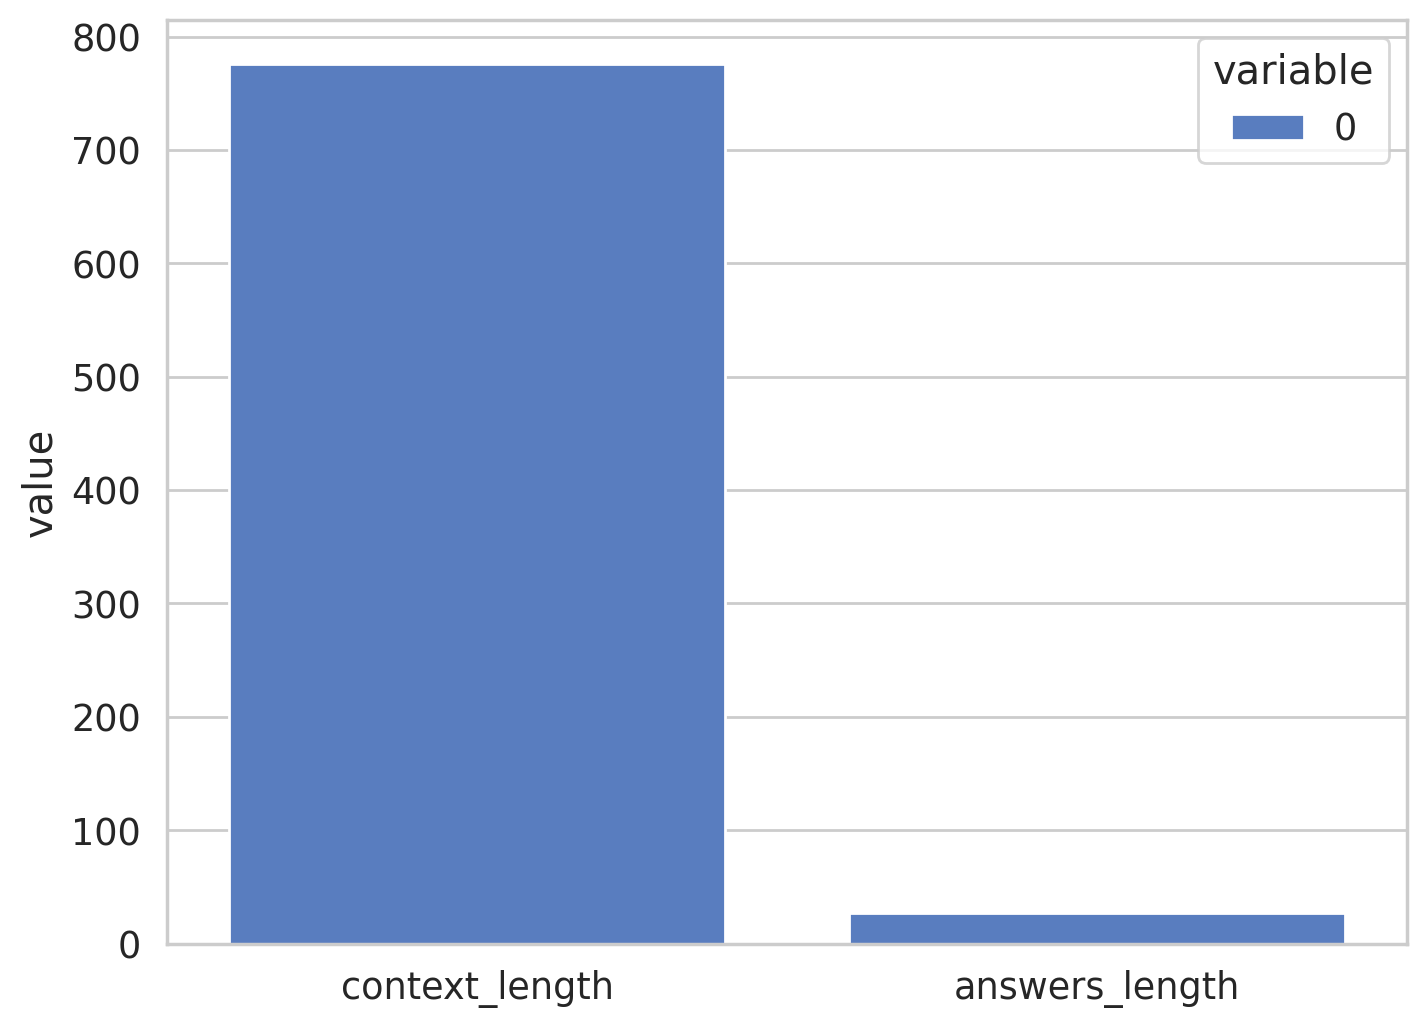

In [ ]:
df_new = pd.melt(ca_length, ignore_index= False)
plt.figure(figsize=(8,6))
sns.barplot(x = df_new.index, y = 'value', hue = 'variable', data = df_new)
plt.show()

In [ ]:
# context_token_counts, answers_token_counts = [], []

# for _, row in train_df.iterrows():
#   context_token_count = len(tokenizer.encode(row["context"]))
#   context_token_counts.append(context_token_count)

#   answers_token_count = len(tokenizer.encode(row["answers"]))
#   answers_token_counts.append(answers_token_count)


In [ ]:
tokenized_example = tokenizer(train_df.iloc[0]["context"], max_length = 512)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [ ]:
pd.DataFrame(tokenized_example["input_ids"])

,0
0,94
1,7
2,1017
3,8963
4,5
...,...
507,13
508,1730
509,11
510,2530


In [ ]:
from torch.utils.data import  Dataset,DataLoader

In [ ]:
class ClickbaitSummaryDataset(Dataset):
  def __init__(self,
               data: pd.DataFrame,
               tokenizer: T5Tokenizer,
               text_max_token_len: int = 512,
               summary_max_token_len: int = 128):
    self.tokenizer = tokenizer
    self.data = data
    self.text_max_token_len = text_max_token_len
    self.summary_max_token_len = summary_max_token_len

  def __len__(self):
    return len(self.data)

  def __getitem__(self, index: int):
    data_row = self.data.iloc[index]

    text = data_row["context"]

    text_encoding = tokenizer(text,
                              max_length= self.text_max_token_len,
                              padding = "max_length",
                              truncation=True,
                              return_attention_mask = True,
                              add_special_tokens = True,
                              return_tensors = "pt"
                              )
    summary_encoding = tokenizer(data_row["answers"],
                              max_length= self.text_max_token_len,
                              padding = "max_length",
                              truncation=True,
                              return_attention_mask = True,
                              add_special_tokens = True,
                              return_tensors = "pt"
                              )
    labels = summary_encoding["input_ids"]
    labels[labels==0] = -100

    return dict(text=text, summary = data_row["answers"], text_input_ids=text_encoding["input_ids"].flatten(),
                                              text_attention_mask = text_encoding["attention_mask"].flatten(),
                                              labels = labels.flatten(),
                                              labels_attention_mask=summary_encoding["attention_mask"].flatten()
                                              )

In [ ]:
!pip3 install pytorch-lightning==1.2.7 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.7/830.7 kB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 18.5 MB/s eta 0:00:00


In [ ]:
!pip3 install torchtext==0.6 torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.7 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.1
    Uninstalling torchtext-0.15.1:
      Successfully uninstalled torchtext-0.15.1


In [ ]:
import pytorch_lightning as pl

In [ ]:
class ClickbaitSummaryDataModule(pl.LightningDataModule):
  def __int__(self):
    pl.LightningDataModule.__init__()
  
  def setup(self, stage=None):
    self.train_dataset = ClickbaitSummaryDataset(
        self.train_df,
        self.tokenizer,
        self.text_max_token_len,
        self.summary_max_token_len
    )
    self.test_dataset = ClickbaitSummaryDataset(
        self.test_df,
        self.tokenizer,
        self.text_max_token_len,
        self.summary_max_token_len
    )

  def train_dataloader(self):
    return DataLoader(self.train_dataset, batch_size = self.batch_size, shuffle=True, num_workers = 2)
  
  def test_dataloader(self):
    return DataLoader(self.test_dataset, batch_size = self.batch_size, shuffle = True, num_workers = 2)

  def val_dataloader(self):
    return DataLoader(self.test_dataset, batch_size = self.batch_size, shuffle = True, num_workers = 2)

In [ ]:
N_EPOCHS = 5
BATCH_SIZE = 2

data_module = ClickbaitSummaryDataModule()
data_module.train_df = train_df
data_module.test_df = test_df
data_module.tokenizer = tokenizer
data_module.text_max_token_len = 512
data_module.summary_max_token_len = 128
data_module.batch_size = BATCH_SIZE

In [ ]:
class ClickbaitSummaryModel(pl.LightningModule):
  def __init__(self):
    super().__init__()
    self.model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME, return_dict = True)
  
  def forward(self, input_ids, attention_mask, decoder_attention_mask, labels = None):
    output = self.model(
        input_ids,
        attention_mask= attention_mask,
        labels = labels,
        decoder_attention_mask = decoder_attention_mask
    )

    return output.loss, output.logits

  def training_step(self, batch, batch_size):
    input_ids = batch["text_input_ids"]
    attention_mask = batch["text_attention_mask"]
    labels = batch["labels"]
    labels_attention_mask = batch["labels_attention_mask"]

    loss, outputs = self(input_ids = input_ids,
                         attention_mask = attention_mask,
                         decoder_attention_mask = labels_attention_mask,
                         labels = labels)
    
    return loss
    
    def validation_step(self, batch, batch_size):
      input_ids = batch["text_input_ids"]
      attention_mask = batch["text_attention_mask"]
      labels = batch["labels"]
      labels_attention_mask = batch["labels_attention_mask"]

      loss, outputs = self(input_ids = input_ids,
                          attention_mask = attention_mask,
                          decoder_attention_mask = labels_attention_mask,
                          labels = labels)
      return loss

    def test_step(self, batch, batch_size):
      input_ids = batch["text_input_ids"]
      attention_mask = batch["text_attention_mask"]
      labels = batch["labels"]
      labels_attention_mask = batch["labels_attention_mask"]

      loss, outputs = self(input_ids = input_ids,
                          attention_mask = attention_mask,
                          decoder_attention_mask = labels_attention_mask,
                          labels = labels)
      return loss


  def configure_optimizers(self):
    return AdamW(self.parameters(), lr = 0.0001)

In [ ]:
model = ClickbaitSummaryModel()

In [ ]:
trainer = pl.Trainer(
    gpus= 1,
    max_epochs = N_EPOCHS,
    progress_bar_refresh_rate = 40
)

INFO:pytorch_lightning.utilities.distributed:GPU available: True, used: True
INFO:pytorch_lightning.utilities.distributed:TPU available: False, using: 0 TPU cores


In [ ]:
import torch

In [ ]:
torch.has_mps

False

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache() 
model = model.to(device)

In [ ]:
trainer.fit(model, data_module)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/distributed.py:52: UserWarning: you passed in a val_dataloader but have no validation_step. Skipping validation loop
  warnings.warn(*args, **kwargs)
INFO:pytorch_lightning.accelerators.gpu:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
INFO:pytorch_lightning.core.lightning:
  | Name  | Type                       | Params
-----------------------------------------------------
0 | model | T5ForConditionalGeneration | 222 M 
-----------------------------------------------------
222 M     Trainable params
0         Non-trainable params
222 M     Total params
891.614   Total estimated model params size (MB)
/usr/local/lib/pyt

Training: 0it [00:00, ?it/s]

1

In [ ]:
trainer.logged_metrics

{'epoch': tensor(4.)}

In [ ]:
trained_model = ClickbaitSummaryModel.load_from_checkpoint(
    trainer.checkpoint_callback.best_model_path
)

trained_model.freeze()

In [ ]:
def summarizeText(text):
  text_encoding = tokenizer(
      text, 
      max_length = 512,
      padding = 'max_length',
      truncation = True,
      return_attention_mask = True,
      add_special_tokens = True,
      return_tensors = 'pt'
  )

  generated_ids = trained_model.model.generate(
      input_ids = text_encoding['input_ids'],
      attention_mask = text_encoding['attention_mask'],
      max_length = 150,
      num_beams = 3,
      repetition_penalty=2.5,
      length_penalty = 1.0,
      early_stopping=True
  )


  preds = [ tokenizer.decode(gen_id, skip_special_tokens=True, clean_up_tokenization_spaces=True)
            for gen_id in generated_ids
  ]
  
  return "".join(preds)

In [ ]:
sample_row = test_df.iloc[1]
text = sample_row['context']
model_summary = summarizeText(text)
text

'The mythology of punk music\'s evolution can be traced back, more or less, to one singular staple: CBGB. Opened in 1973 in downtown Manhattan\'s East Village, the nightclub that originally intended to house country, bluegrass and blues music (hint its acronym) quickly became a breeding ground for bands like The Ramones, Talking Heads and The Police, among countless others. The legacy of the club, which closed in 2006 over a rent dispute, is on display in a new movie that stars Alan Rickman as bemused owner Hilly Kristal. It\'s a bit of a departure for anyone more accustomed to seeing Rickman, 67, play sinister Severus Snape in "Harry Potter" or Judge Turpin in "Sweeney Todd." The movie also afforded him the opportunity to reunite with fellow Hogwarts alum Rupert Grint, who portrays one-third of derriere-bearing punk band The Dead Boys, alongside Justin Bartha and Bronson Adams. They\'re joined by a revolving door of notable faces, including Malin Akerman as Debbie Harry, Taylor Hawkin

In [ ]:
sample_row['answers']

'Alan Rickman & Rupert Grint,CBGB'

In [ ]:
model_summary

"CBGB,I'm rehearsing a play that will start [in London] in a couple of weeks"

In [ ]:
for i in range(20):
  sample_row = test_df.iloc[i]
  text = sample_row['context']
  model_summary = summarizeText(text)

In [ ]:
test_dataset_len= len(test_df)

In [ ]:
final_predictions = []

In [ ]:
from datasets import load_dataset, load_metric

In [ ]:
metric = load_metric('squad')

<ipython-input-77-a2ea8d2d41f0>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric('squad')


In [ ]:
formatted_predictions = [{"id": i, "prediction_text": summarizeText(context)} for i, context in enumerate(test_df["context"])]
references = [{"id": i, "answers": {"answer_start":[0], "text":[ex]}} for i, ex in enumerate(test_df["answers"])]
result = metric.compute(predictions=formatted_predictions, references=references)

In [ ]:
print(result)

{'exact_match': 3.4965034965034967, 'f1': 31.36959508083681}


In [ ]:
print(formatted_predictions[0], references[0])

{'id': 0, 'prediction_text': 'Arpaio,repeatedly and intentionally violated judicial orders to stop profiling Latinos'} {'id': 0, 'answers': {'answer_start': [0], 'text': ['"intentionally",could transform a court case against Phoenix-area Sheriff Joe Arpaio from civil charges to a criminal prosecution']}}


In [ ]:
result

{'exact_match': 3.4965034965034967, 'f1': 31.36959508083681}

In [ ]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 10.7 MB/s eta 0:00:00


In [ ]:
import evaluate
bleu = evaluate.load('bleu')
results = 0
prediction_test = []
reference_test = []

for i in range(test_dataset_len):
  prediction_test.append(formatted_predictions[i]["prediction_text"].strip())
  reference_test.append(references[i]["answers"]["text"][0].strip())

results = bleu.compute(predictions = prediction_test, references = reference_test).get("bleu")

print(f"BLEU SCORE: {results}")

BLEU SCORE: 0.24891061603890552


In [ ]:
meteor = evaluate.load('meteor')
results = 0

results = meteor.compute(predictions = prediction_test, references = reference_test).get("meteor")

print(f"METEOR SCORE: {results}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


METEOR SCORE: 0.35138451045694846


In [ ]:
!pip install bert_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 238.8 kB/s eta 0:00:00


In [ ]:
# BERTScore
from statistics import mean

bert_score = evaluate.load("bertscore")

results = bert_score.compute(predictions = prediction_test, references = reference_test, lang='en')

print("BERT F1 Score: ", mean(results.get("f1")))

BERT F1 Score:  0.8831089022276285


In [ ]:
!pip3 install rouge_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=356716502a450ac8970b0d6d1968c2efe49115c35626201c27f7575944a0c700
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
rouge = evaluate.load('rouge')

results = rouge.compute(predictions = prediction_test, references = reference_test)


print(results.keys())

print(f"ROGUE SCORE (Uni gram): {results['rouge1']}")
print(f"ROGUE SCORE (Bi gram): {results['rouge2']}")
print(f"ROUGE SCORE (LCS): {results['rougeL']}")
print(f"ROGUE SCORE (Lsum): {results['rougeLsum']}")

dict_keys(['rouge1', 'rouge2', 'rougeL', 'rougeLsum'])
ROGUE SCORE (Uni gram): 0.41822383570659993
ROGUE SCORE (Bi gram): 0.32599579374014065
ROUGE SCORE (LCS): 0.39773184640792325
ROGUE SCORE (Lsum): 0.39907941266603253


In [ ]:
# Correctly Interpreted Results
sample_row = test_df.iloc[3]
actual_summary = sample_row["answers"]
text = sample_row['context']
model_summary = summarizeText(text)

In [ ]:
actual_summary

'Marcia Clark,Does she think Simpson really did it?'

In [ ]:
model_summary

'Marcia Clark,Does she think Simpson really did it?'

In [ ]:
# Incorrectly Interpreted Results

In [ ]:
sample_row = test_df.iloc[0]
actual_summary = sample_row["answers"]
text = sample_row['context']
model_summary = summarizeText(text)

In [ ]:
actual_summary

'"intentionally",could transform a court case against Phoenix-area Sheriff Joe Arpaio from civil charges to a criminal prosecution'

In [ ]:
model_summary

'Arpaio,repeatedly and intentionally violated judicial orders to stop profiling Latinos'